In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

#ShapeFile : https://github.com/geohacker/kerala

gdf_district = gpd.read_file('kerala-master\kerala-master\shapefiles\district.shp')
gdf_district.head(15)


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((76.37334 9.83565, 76.37955 9.82888, ..."
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((76.68924 10.26721, 76.68724 10.26170..."
2,Idukki,Kerala,32,9,596,232,"POLYGON ((77.28895 10.22973, 77.29462 10.21643..."
3,Kannur,Kerala,32,2,589,277,"POLYGON ((75.46997 12.30049, 75.48558 12.29131..."
4,Kasaragod,Kerala,32,1,588,288,"POLYGON ((75.41667 12.50166, 75.42240 12.48463..."
5,Kollam,Kerala,32,13,600,314,"POLYGON ((77.20860 9.07053, 77.20579 9.06505, ..."
6,Kottayam,Kerala,32,10,597,320,"POLYGON ((76.63309 9.85565, 76.63167 9.85296, ..."
7,Kozhikode,Kerala,32,4,591,321,"POLYGON ((75.53697 11.69275, 75.54093 11.69615..."
8,Malappuram,Kerala,32,5,592,358,"POLYGON ((76.44699 11.20171, 76.44112 11.20301..."
9,Palakkad,Kerala,32,6,593,422,"POLYGON ((76.83918 10.33834, 76.83516 10.33669..."


<Axes: >

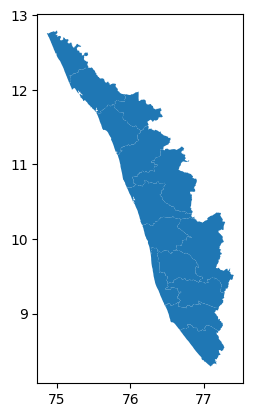

In [32]:
gdf_district.plot()

In [33]:
# https://dashboard.kerala.gov.in/covid/daily.php

df = pd.read_csv("data.csv")
df.head(15)

,District,Confirmed,Death,Active
0,Ernakulam,942032,8526,2566
1,Thiruvananthapuram,754705,8645,1739
2,Kottayam,475156,4670,1175
3,Thrissur,685065,7560,815
4,Pathanamthitta,281518,2617,493
5,Palakkad,456523,5817,467
6,Alappuzha,401742,5272,457
7,Kollam,528398,6655,400
8,Idukki,215841,1552,312
9,Malappuram,651330,6480,262


In [34]:
gdf_merged = gdf_district.merge(df,left_on='DISTRICT',right_on='District',how='left')
gdf_merged.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry,District,Confirmed,Death,Active
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((76.37334 9.83565, 76.37955 9.82888, ...",Alappuzha,401742,5272,457
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((76.68924 10.26721, 76.68724 10.26170...",Ernakulam,942032,8526,2566
2,Idukki,Kerala,32,9,596,232,"POLYGON ((77.28895 10.22973, 77.29462 10.21643...",Idukki,215841,1552,312
3,Kannur,Kerala,32,2,589,277,"POLYGON ((75.46997 12.30049, 75.48558 12.29131...",Kannur,352701,4479,74
4,Kasaragod,Kerala,32,1,588,288,"POLYGON ((75.41667 12.50166, 75.42240 12.48463...",Kasaragod,168283,1400,88


C:\Users\91702\AppData\Local\Temp\ipykernel_18760\23543164.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(gdf_merged.geometry.centroid.x)
C:\Users\91702\AppData\Local\Temp\ipykernel_18760\23543164.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(gdf_merged.geometry.centroid.y)
C:\Users\91702\AppData\Local\Temp\ipykernel_18760\23543164.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['DISTRICT']):


0     76.449580
1     76.472682
2     77.027463
3     75.526238
4     75.153682
5     76.874870
6     76.650919
7     75.834361
8     76.155781
9     76.558584
10    76.928967
11    77.015000
12    76.316150
13    76.098133
dtype: float64
0      9.423558
1     10.057658
2      9.882198
3     12.000633
4     12.462818
5      8.960991
6      9.637065
7     11.484801
8     11.132066
9     10.794641
10     9.284061
11     8.608458
12    10.471178
13    11.711246
dtype: float64


Text(369.1297513982104, 0.5, 'Latitude')

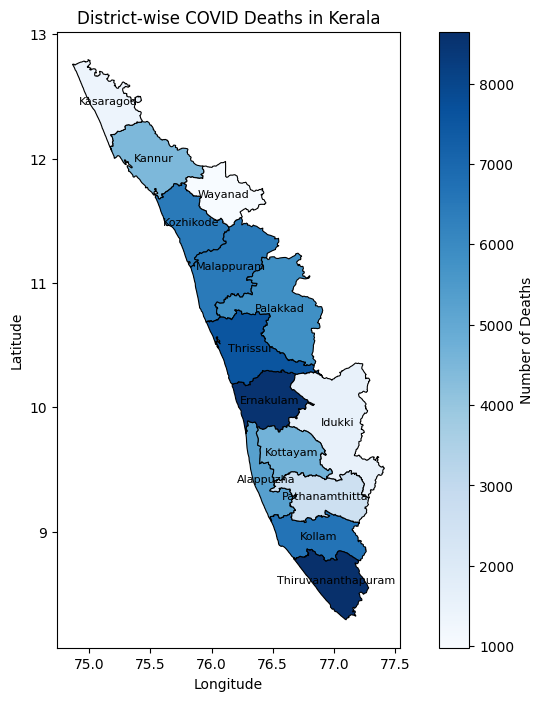

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
print(gdf_merged.geometry.centroid.x)
print(gdf_merged.geometry.centroid.y)


for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['DISTRICT']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')
gdf_district.plot(ax=ax, column=gdf_merged['Death'], cmap="Blues", edgecolor='black', linewidth=0.8, legend=True,legend_kwds={'label': 'Number of Deaths'})

ax.set_title('District-wise COVID Deaths in Kerala')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

C:\Users\91702\AppData\Local\Temp\ipykernel_18760\2978559065.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['DISTRICT']):


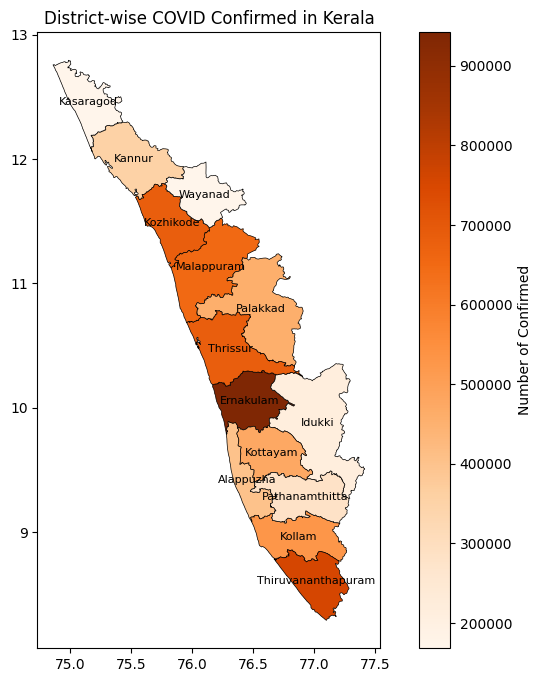

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_title('District-wise COVID Confirmed in Kerala')
gdf_merged.plot(ax=ax, column='Confirmed', cmap='Oranges', legend=True,
                legend_kwds={'label': 'Number of Confirmed'}, edgecolor='black', linewidth=0.5)
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['DISTRICT']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
plt.show()
